# Reading and Writing Images

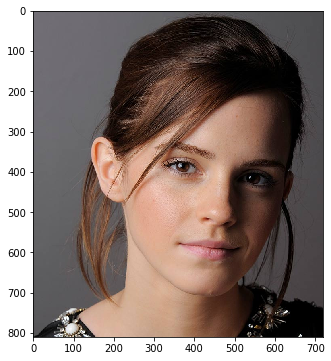

In [8]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

filename = './images/emma.jpg'
img = cv.imread(filename, cv.IMREAD_COLOR)
img_show = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img = cv.add(img, 40)
cv.imwrite('./results/emma_processed.jpg', img)

fig, ax = plt.subplots(1, figsize =(6,6))
ax.imshow(img_show)
plt.show()


In [9]:
print(img.shape)

(810, 720, 3)


In [11]:
import numpy as np
a = np.array([1,2,3, 4])
print(a)

[1 2 3 4]


# Gaussian Noise Removal

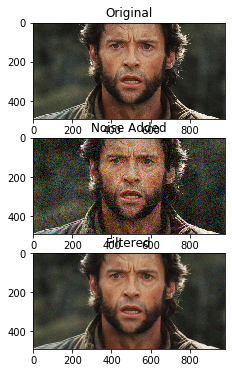

In [28]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

fn = './images/hugh.jpg'
imgo = cv.imread(fn, cv.IMREAD_COLOR)
mu = 0
sigma = 20
noise = np.array(imgo.shape).astype('uint8')
noise = np.random.normal(mu, sigma, imgo.shape)
noise = noise.reshape(imgo.shape)
noisy_image = cv.add(imgo, noise, dtype=cv.CV_8UC3)
filtered = cv.GaussianBlur(noisy_image, (5,5), 2)

# Color conversions to be able to show in matplotlib
noisy_image_show = cv.cvtColor(noisy_image, cv.COLOR_BGR2RGB)
imgo_show = cv.cvtColor(imgo, cv.COLOR_BGR2RGB)
filtered_show = cv.cvtColor(filtered, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(3, figsize = (12,6))
ax[0].imshow(imgo_show)
ax[0].set_title('Original')
ax[1].imshow(noisy_image_show)
ax[1].set_title('Noise Added')
ax[2].imshow(filtered_show)
ax[2].set_title('Filtered')
plt.show()

In [16]:
print(noise.shape)

(3,)


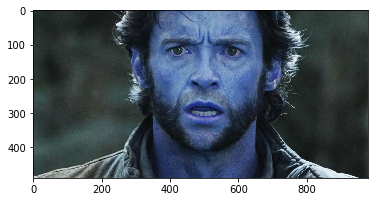

(490, 980, 3)
uint8
1440600


In [3]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

fn = './images/hugh.jpg'
imgo = cv.imread(fn, cv.IMREAD_COLOR)

fig, ax = plt.subplots()
ax.imshow(imgo)
plt.show()

print(imgo.shape)
print(imgo.dtype)
print(imgo.size)



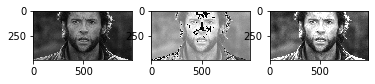

In [6]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt

fn = './images/hugh.jpg'
im1 = cv.imread(fn, cv.IMREAD_GRAYSCALE)
im2 = im1 + 100
im3 = cv.add(im1,100)
fig, ax = plt.subplots(1,3)
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap='gray')
ax[2].imshow(im3, cmap='gray')
plt.show()

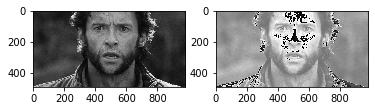

In [11]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def image_brighten(image, shift):
    h = image.shape[0]
    w = image.shape[1]
    result = np.zeros((h,w), np.uint8)
    for i in range(0,h):
        for j in range(0,w):
            result[i,j] = image[i,j] + 100
    return result

fn = './images/hugh.jpg'
im1 = cv.imread(fn, cv.IMREAD_GRAYSCALE)

im2 = image_brighten(im1, 100)
fig, ax = plt.subplots(1,2, figsize=(6,6))
ax[0].imshow(im1, cmap='gray')
ax[1].imshow(im2, cmap='gray')
# ax[2].imshow(im3, cmap='gray')
plt.show()

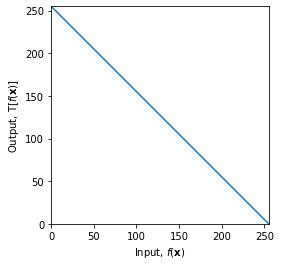

(450, 600)


In [2]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
transform = np.arange(0,256).astype('uint8')
transform = np.arange(255, -1, -1).astype('uint8')
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()
img_orig = cv.imread('./images/katrina.jpg', cv.IMREAD_GRAYSCALE)
print(img_orig.shape)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)

cv.imshow('Image', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

In [3]:
print(transform.shape)

(256,)


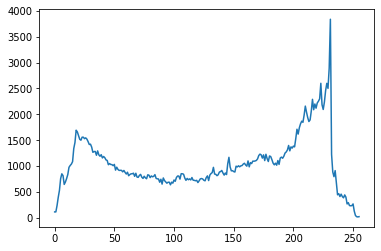

In [3]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('./images/katrina.jpg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0,256])

plt.plot(hist)
plt.show()

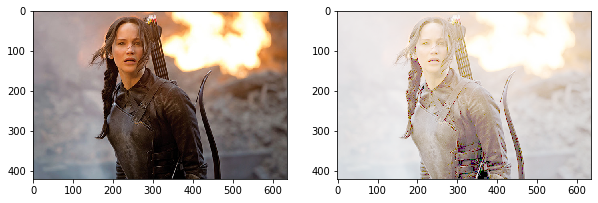

In [17]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('./images/katniss.jpg')
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)
gamma = 0.2
transform = (np.arange(0,256)/255.)**gamma

im2 = cv.LUT(im1, transform)*255
im2 = im2.astype('uint8')

fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im1)
ax[1].imshow(im2)
plt.show()

In [28]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('./images/maya.jpg', cv.IMREAD_REDUCED_COLOR_2)

kernel = np.array([[1./9., 1./9., 1./9.], [1./9., 1./9., 1./9.], [1./9., 1./9., 1./9.]])
kernel = 1/25.*np.ones((5,5))

im2 = cv.filter2D(im1, cv.CV_8U, kernel)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im1)
cv.waitKey(0)

cv.imshow('Image', im2)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
print(kernel.shape)
print(sum(sum(kernel)))

(5, 5)
1.0


In [38]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread('./images/building.tif', cv.IMREAD_GRAYSCALE)

kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im2 = cv.filter2D(im1, cv.CV_8U, kernel)
im2 = cv.normalize(im2 + 127, im2, 255, 0, cv.NORM_MINMAX)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image', im1)
cv.waitKey(0)

cv.imshow('Image', im2)
cv.waitKey(0)
cv.destroyAllWindows()

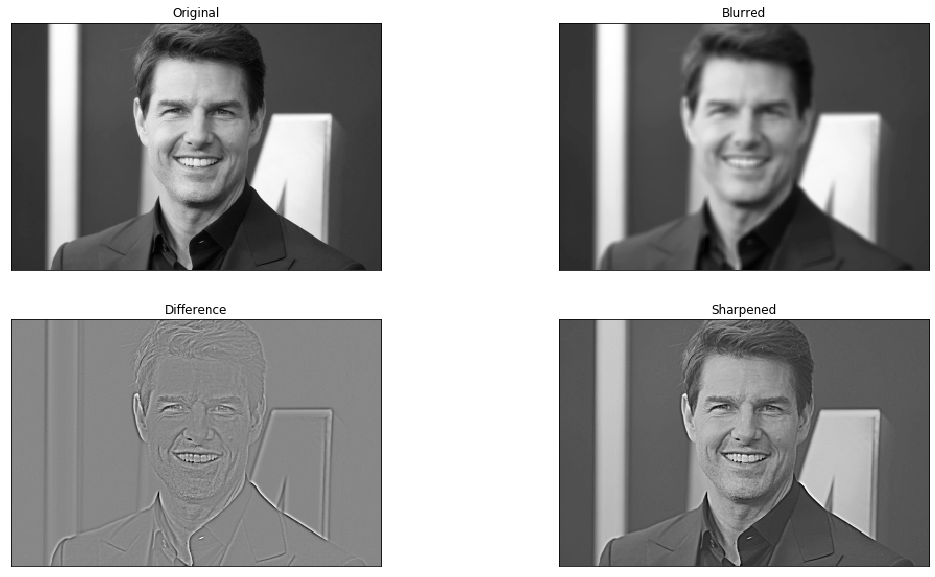

In [44]:
# Sharpening
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('./images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = 1/25.*np.ones((5,5))
blurred = cv.filter2D(img, cv.CV_8U, kernel)
diff = img.astype('float32') - blurred.astype('float32')
sharpened = cv.addWeighted(img.astype('float32') , 1.0, diff, 1.5, 0)



fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(18,10))
axes[0,0].imshow(img, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])
axes[0,1].imshow(blurred, cmap='gray')
axes[0,1].set_title('Blurred')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])
axes[1,0].imshow(diff + 125, cmap='gray')
axes[1,0].set_title('Difference')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])
axes[1,1].imshow(sharpened, cmap='gray')
axes[1,1].set_title('Sharpened')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])
plt.show()

# Feb. 7, 2010

## 1-D Gaussians

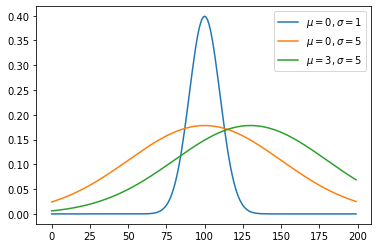

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def g(x, mu,  sigma):
    return 1./math.sqrt(2*math.pi*sigma)*np.exp(-(x- mu)**2/(2*sigma**2))

x = np.arange(-10, 10, 0.1)
plt.plot(g(x, 0, 1), label='$\mu = 0, \sigma = 1$')
plt.plot(g(x, 0, 5), label='$\mu = 0, \sigma = 5$')
plt.plot(g(x, 3, 5), label='$\mu = 3, \sigma = 5$')
plt.legend()
plt.show()

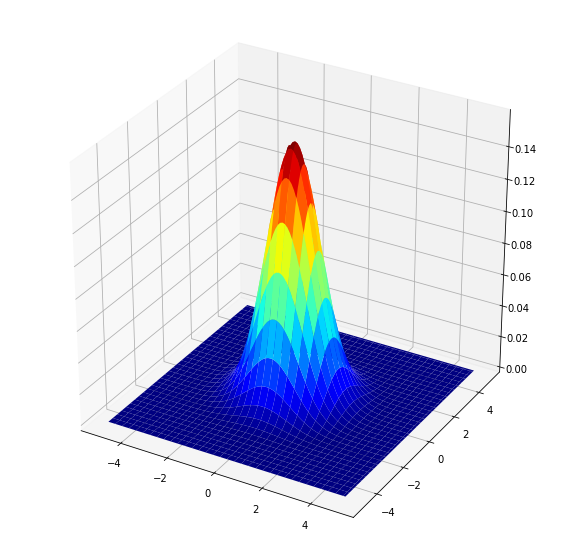

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

X = np.arange(-5, 5.1, 0.1)
Y = np.arange(-5, 5.1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = 1./(2*math.pi*sigma)*np.exp(-(X**2 + Y**2)/(2*sigma**2))

surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)
plt.show()

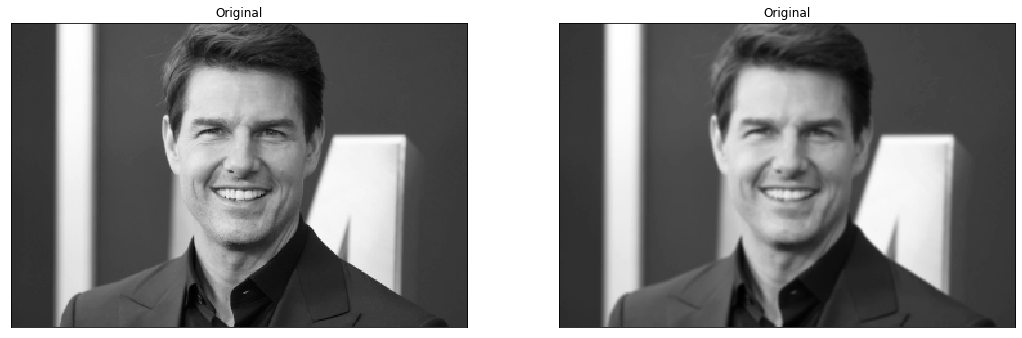

In [26]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

img = cv.imread('./images/tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2)

kernel = np.array([[0.075, 0.124, 0.075],[0.124, 0.204, 0.124],[0.075, 0.124, 0.075]])
blurred = cv.filter2D(img, cv.CV_8U, kernel)

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,10))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(blurred, cmap='gray')
axes[1].set_title('Original')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

In [27]:
print(kernel)

[[0.075 0.124 0.075]
 [0.124 0.204 0.124]
 [0.075 0.124 0.075]]


# Adding Noise to an Image and Gaussian Filtering

In [3]:
# Gaussian Noise Filtering
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('./images/gal.jpg', cv.IMREAD_COLOR)

# Noise addition
mu = 0.0
sigma = 20
gauss = np.array(img.shape).astype('uint8')
h, w, c = img.shape
gauss = np.random.normal(mu,sigma, (h, w, c))
noisy = cv.add(img, gauss, dtype=cv.CV_8UC3)

kernel = cv.getGaussianKernel(11, 3.)
filtered = cv.sepFilter2D(noisy, -1, kernel, kernel)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", noisy)
cv.waitKey(0)

cv.imshow("Image", filtered)
cv.waitKey(0)
cv.destroyAllWindows()

uint8
255


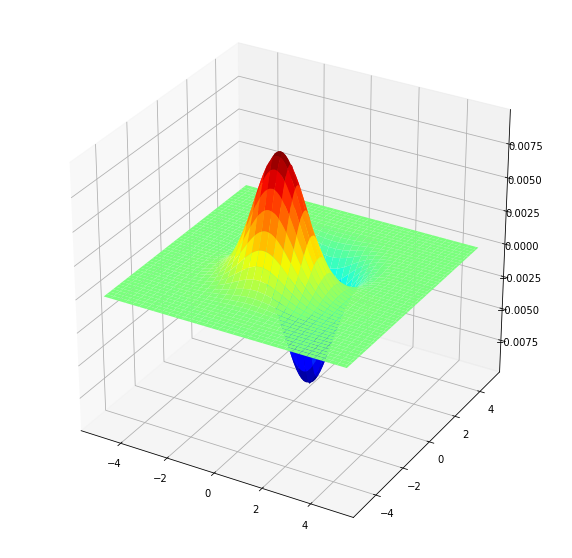

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import math

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sigma = 1

X = np.arange(-5, 5.1, 0.1)
Y = np.arange(-5, 5.1, 0.1)
X, Y = np.meshgrid(X, Y)
Z = 1./(2*math.pi*sigma)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
Z_ = Z
Zx = Z[1:-1, :] - Z_[0:-2, :]

surf = ax.plot_surface(X[1:-1, :], Y[1:-1, :], Zx, cmap=cm.jet, linewidth=0, antialiased=True)
plt.show()

In [22]:
%matplotlib inline
import cv2 as cv

im = cv.imread('./images/building.tif')
edges1 = cv.Canny(im, 20, 200)
edges2 = cv.Canny(im, 20, 100)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", im)
cv.waitKey(0)
cv.imshow("Image", edges1)
cv.waitKey(0)
cv.imshow("Image", edges2)
cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
#  Harris Corners Using the OpenCV Function
import numpy as np
import cv2 as cv
filename = './images/wirebond.tif'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv.imshow('dst',img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()


In [4]:
import numpy as np
import cv2 as cv
filename = './images/building.tif'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
I = np.float32(gray)
kernel = np.array([[-1], [0], [1]])
Ix = cv.filter2D(I, cv.CV_32F, kernel)
print(Ix.dtype)

kernel = np.array([[-1, 0, 1]])
Iy = cv.filter2D(I, cv.CV_32F, kernel)
sigma = 3
ksize = 11
m11 = cv.GaussianBlur(Ix*Ix, (ksize, ksize), sigma)
m22 = cv.GaussianBlur(Iy*Iy, (ksize, ksize), sigma)
m12 = cv.GaussianBlur(Ix*Iy, (ksize, ksize), sigma)
m21 = m12

det = m11*m22 - m12*m21
trace = m11 + m22
alpha = 0.04
R = det - alpha*trace*trace


cv.namedWindow('Display', cv.WINDOW_AUTOSIZE)
cv.imshow('Display', gray)
cv.waitKey(0)
cv.imshow('Display', Ix)
cv.waitKey(0)
cv.imshow('Display', Iy)
cv.waitKey(0)
cv.imshow('Display', R)
cv.waitKey(0)
cv.destroyAllWindows()


float32


# CNNs

In [16]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt


2.1.0


In [9]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
5


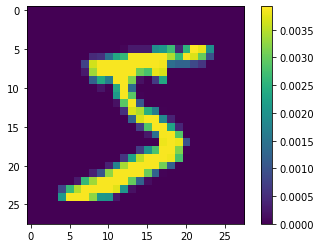

In [22]:
%matplotlib inline
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plt.figure()
plt.imshow(train_images[0])
print(train_labels[0])
plt.colorbar()
plt.grid(False)
plt.show()

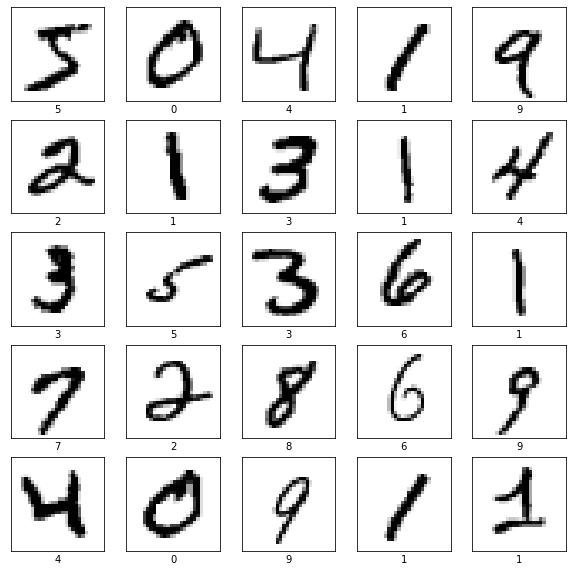

In [23]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 151us/sample - loss: 2.3008 - accuracy: 0.1124
Epoch 2/10
60000/60000 [==============================] - 10s 164us/sample - loss: 2.2994 - accuracy: 0.1124
Epoch 3/10
60000/60000 [==============================] - 11s 179us/sample - loss: 2.2957 - accuracy: 0.1176
Epoch 4/10
60000/60000 [==============================] - 11s 175us/sample - loss: 2.2868 - accuracy: 0.1424
Epoch 5/10
60000/60000 [==============================] - 11s 179us/sample - loss: 2.2706 - accuracy: 0.1790
Epoch 6/10
60000/60000 [==============================] - 10s 169us/sample - loss: 2.2471 - accuracy: 0.1969
Epoch 7/10
60000/60000 [==============================] - 10s 161us/sample - loss: 2.2179 - accuracy: 0.2104
Epoch 8/10
60000/60000 [==============================] - 10s 160us/sample - loss: 2.1842 - accuracy: 0.2360
Epoch 9/10
60000/60000 [==============================] - 10s 159us/sample - loss: 2.1472 - accuracy: 0.26

In [28]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 2.0831 - accuracy: 0.3154

Test accuracy: 0.3154


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(28, 28,1)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (60000, 28, 28)